<a href="https://colab.research.google.com/github/Tapanmittal13/Data_Science/blob/master/Updated_Assignment_9_GRADCAM_%26Cut_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Saved Model (Assgn 6A)

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

print(train_features.shape)
print(train_labels.shape)
print(num_classes)

(50000, 32, 32, 3)
(50000, 1)
10


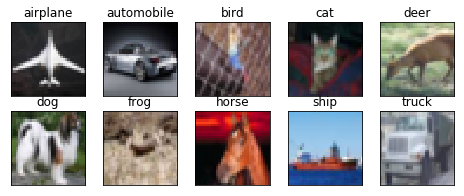

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
#train_features = train_features.astype('float32')/255
#test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras import regularizers

# Define the model
model = Sequential()
weight_decay=0.001

#Convolution block
model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32, 32, 3))) #32 #3
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #32 #5
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #16 #10
model.add(Convolution2D(10,1,kernel_regularizer=regularizers.l2(weight_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


#Convolution block
model.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16 #12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16 #14
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #8 #28
model.add(Convolution2D(10,1,kernel_regularizer=regularizers.l2(weight_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


#Convolution block
model.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8 #30
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8 #32
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #4 #64
model.add(Convolution2D(10,1))#,kernel_regularizer=regularizers.l2(weight_decay))) #even regularization shouldnt be used here
#model.add(Activation('relu'))  #Shouldnt have used this here
#model.add(BatchNormalization()) #even this shouldnt be used here

#Prediction layer
model.add(Convolution2D(10,4))
model.add(Flatten())
model.add(Activation('softmax'))


          
# Compile the model
  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<ke

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
__________

In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/EVA/Project_9/model.hdf5"

#epochs:{epoch:03d}-val_acc:{val_acc:.3f}

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=False)
callbacks = [checkpoint] 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=False,featurewise_center=True, featurewise_std_normalization=True)
#testgen=ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(train_features)


iterator=datagen.flow(train_features, train_labels, batch_size = len(train_features))
batchX, batchy = iterator.next()

iterator1=datagen.flow(test_features, test_labels,batch_size = len(test_features))
test_batchX,test_batchy=iterator1.next()

X_train = batchX
X_test = test_batchX

Y_train=batchy
Y_test=test_batchy

In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test),callbacks=callbacks,verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 14s 35ms/step - loss: 1.8172 - acc: 0.4632 - val_loss: 1.5098 - val_acc: 0.5722

Epoch 00001: val_acc improved from -inf to 0.57220, saving model to /content/gdrive/My Drive/EVA/Project_9/model.hdf5
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3408 - acc: 0.6242 - val_loss: 1.2402 - val_acc: 0.6630

Epoch 00002: val_acc improved from 0.57220 to 0.66300, saving model to /content/gdrive/My Drive/EVA/Project_9/model.hdf5
Epoch 3/100
390/390 [==============================] - 9s 24ms/step - loss: 1.1433 - acc: 0.6857 - val_loss: 1.1148 - val_acc: 0.6936

Epoch 00003: val_acc improved from 0.66300 to 0.69360, saving model to /content/gdrive/My Drive/EVA/Project_9/model.hdf5
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 1.0354 - acc: 0.7185 - val_loss: 1.0459 - val_acc: 0.7087

Epoch 00004: val_acc improved from 0.69360 to 0.70870, saving model to /content/gdrive/My Drive/EVA

Model took 926.90 seconds to train


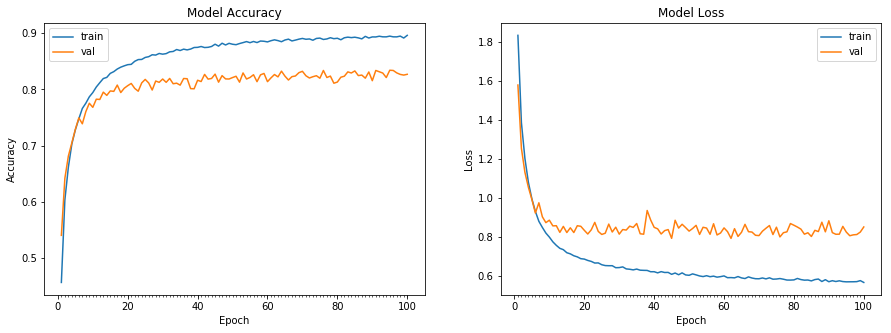

Accuracy on test data is: 82.69


In [0]:
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

#Grad CAM without Cutout

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import cv2

from sklearn.utils import shuffle
import gc
import matplotlib.gridspec as gridspec

In [0]:
def get_cifar10_data(preprocess=False):
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    num_classes = len(np.unique(y_train))
    X_train, y_train = shuffle(X_train, y_train)
    X_test, y_test = shuffle(X_test, y_test)

    if preprocess:
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        X_train /= 255
        X_test /= 255

    Y_train = np_utils.to_categorical(y_train, num_classes)
    Y_test = np_utils.to_categorical(y_test, num_classes)
    return X_train, Y_train, X_test, Y_test

In [0]:
def min_max_scale(X):
  return (X - np.min(X))/(np.max(X)-np.min(X))

In [0]:
def show_examples(X,y,classes):
    rows = int(np.ceil(len(X)/5))
    if X.shape[1] > 64:
        multiplier = 2
    else:
        multiplier = 1
    fig = plt.figure(figsize=(10*multiplier, rows*2*multiplier))
    for idx in np.arange(len(X)):
        img = X[idx]
        assert (len(img.shape)==3 and img.shape[2] in [1,3,4]) or len(img.shape)==2
        ax = fig.add_subplot(rows, 5, idx + 1, xticks=[], yticks=[])
        cmap = None
        if (len(img.shape)==3 and img.shape[2]==1) or len(img.shape)==2:
            cmap="binary"
        if len(img.shape)==3 and img.shape[2]==1:
            img = img.reshape((img.shape[0],img.shape[1]))
        ax.imshow(img,cmap=cmap)
        ax.set_title(classes[np.argmax(y[idx])])
    plt.show()

In [0]:
def get_cifar10_labels():
    return ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

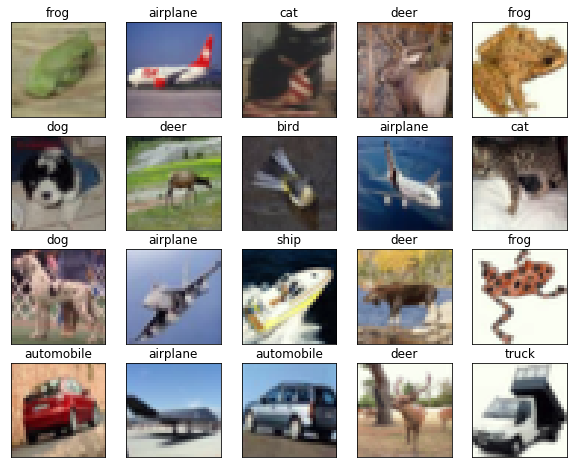

In [0]:
X_train, Y_train, X_test, Y_test = get_cifar10_data(preprocess=False)
classes = get_cifar10_labels()
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,)
_ = datagen.fit(X_train)
train_iterator = datagen.flow(X_train, Y_train, batch_size=100,shuffle=False)

X_e, Y_e = train_iterator.next()

X_e = min_max_scale(X_e)
show_examples(X_e[79:99], Y_e[79:99], classes)

In [0]:
from keras.models import load_model

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir("/content/gdrive/My Drive/EVA/Project_9")

In [0]:
model = load_model('model.hdf5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

**Grad CAM**

In [0]:
def gradcam(model,layer,img,normalized_input=True,show=False):
  if not normalized_input:
    img = img/255
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  layer_out_channels = last_conv_layer.output_shape[-1]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(layer_out_channels):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  heatmap = heatmap/255
  
#   superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0)
  superimposed_img = 0.7*(img) + 0.3*heatmap
  superimposed_img = superimposed_img
  if show:
    plt.imshow(img)
    plt.show()
    plt.imshow(heatmap)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()
  return img,heatmap,superimposed_img

# _ = gradcam(model,"output_transition",X_e[0],show=True)

def show_examples_with_gradcam(model,layer,X,Y,classes,image_size_multiplier=2):
  Y = np.argmax(Y, axis=1)
  columns = 5
  rows = int(np.ceil(len(X) / columns))
  
  fig_height = rows * image_size_multiplier * 3
  fig_width = columns * image_size_multiplier
  fig = plt.figure(figsize=(fig_width, fig_height))
  outer = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.2)
  for i in range(rows*columns):
    if i>=len(X):
      break
    x = X[i]
    y = Y[i]
    img,heatmap,superimposed_img = gradcam(model,layer,x,show=False)
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.0, hspace=0.15)
    imgs = [img,heatmap,superimposed_img]
    titles = ["Image: "+classes[y],"HeatMap","SuperImposed Image"]
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(imgs[j])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[j])
        fig.add_subplot(ax)
  
  fig.show()

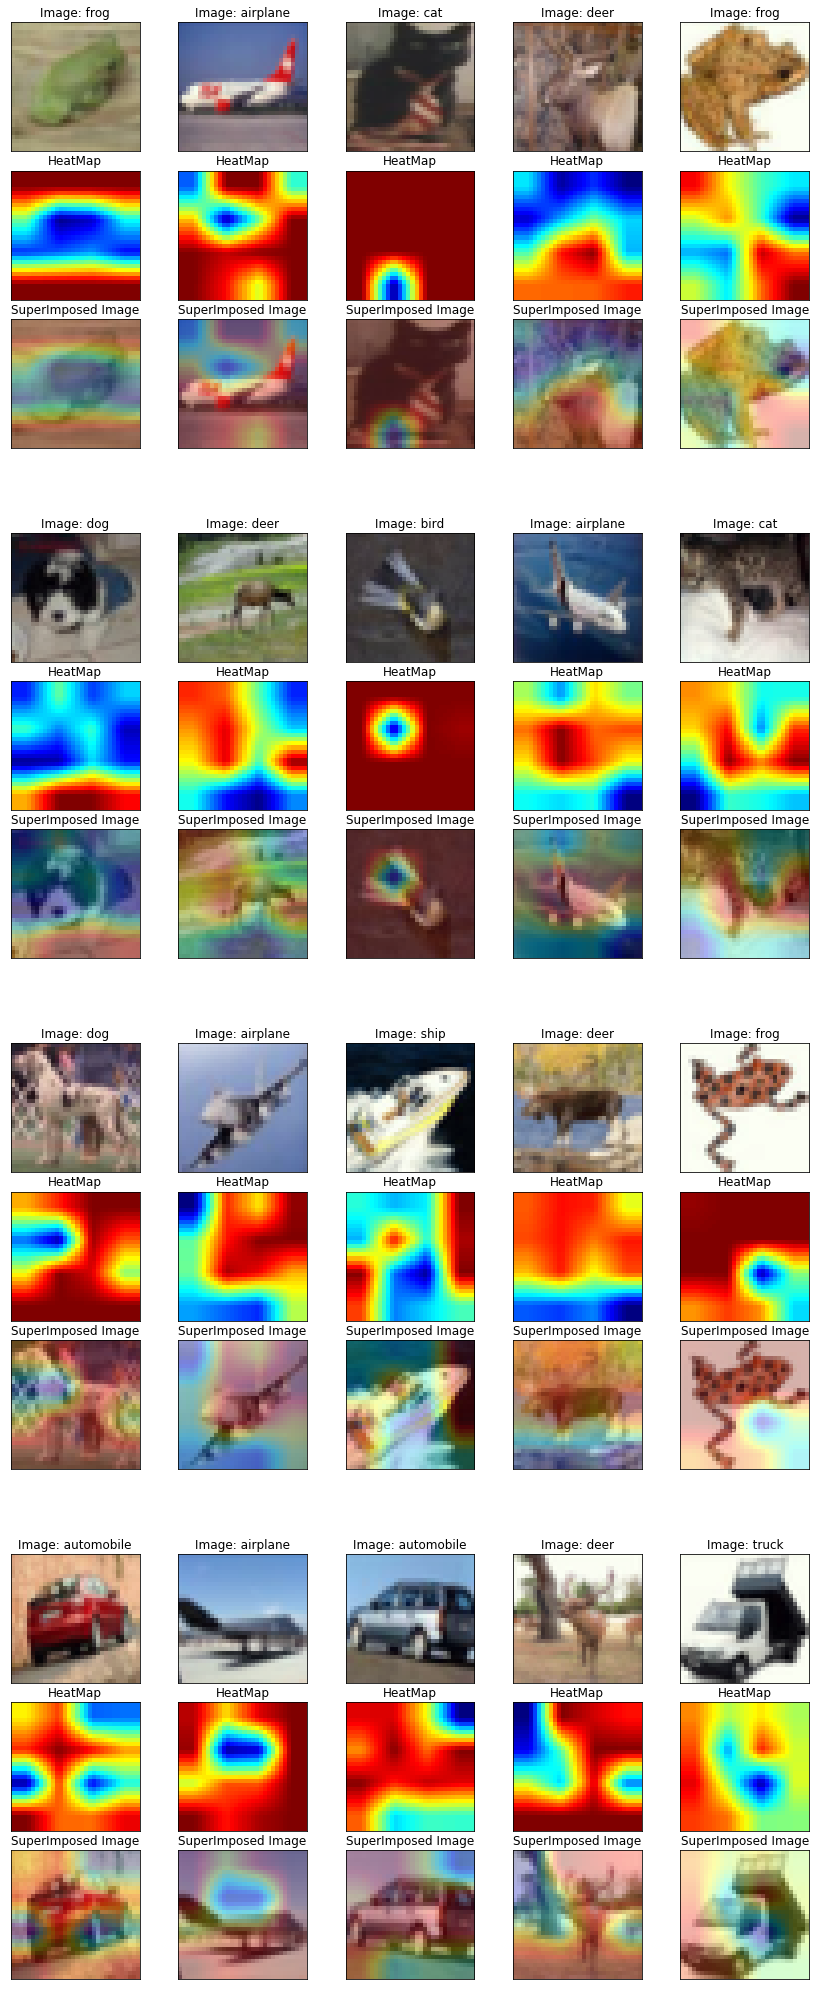

In [0]:
show_examples_with_gradcam(model,"conv2d_9",X_e[79:99], Y_e[79:99],classes,image_size_multiplier=3)

#Grad CAM with Cutout

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import cv2
from keras import regularizers
from keras.callbacks import *

from sklearn.utils import shuffle
import gc
import matplotlib.gridspec as gridspec


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Define the model
model = Sequential()
weight_decay=0.001

#Convolution block
model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32, 32, 3))) #32 #3
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #32 #5
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #16 #10
model.add(Convolution2D(10,1,kernel_regularizer=regularizers.l2(weight_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


#Convolution block
model.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16 #12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16 #14
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #8 #28
model.add(Convolution2D(10,1,kernel_regularizer=regularizers.l2(weight_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


#Convolution block
model.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8 #30
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8 #32
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #4 #64
model.add(Convolution2D(10,1))#,kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())

#Prediction layer
model.add(Convolution2D(10,4))
model.add(Flatten())
model.add(Activation('softmax'))


          
# Compile the model
  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regulari

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
filepath="/content/gdrive/My Drive/EVA/Project_9/model_with_cutout.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=False)
callbacks = [checkpoint] 

In [0]:
#!wget https://github.com/yu4u/cutout-random-erasing/blob/master/random_eraser.py
!git clone https://github.com/yu4u/cutout-random-erasing.git

Cloning into 'cutout-random-erasing'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


In [0]:
!ls

cutout-random-erasing  gdrive  random_eraser.py  sample_data


In [0]:
os.chdir("/content/gdrive/My Drive/EVA/Project_9/cutout-random-erasing")

In [0]:
from random_eraser import get_random_eraser 

X_train, Y_train, X_test, Y_test = get_cifar10_data(preprocess=False)
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
# datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

#datagen_validation = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,)
datagen.fit(X_train)
#datagen_validation.fit(X_test)
#print(datagen.mean)
#print(datagen_validation.mean)
iterator=datagen.flow(X_train, Y_train,batch_size=len(X_train), shuffle=False)
batchX, batchy = iterator.next()

iterator1 = datagen.flow(X_test, Y_test, batch_size=len(X_test), shuffle=False)
batch_testX, batch_testy = iterator1.next()

train_X = batchX
test_X = batch_testX

train_y=batchy
test_y=batch_testy


#train_iterator = datagen.flow(X_train, Y_train, batch_size=256,shuffle=True)
#validation_iterator = datagen.flow(X_test, Y_test, batch_size=512,shuffle=True)

#print('Batches train=%d, test=%d' % (len(train_iterator), len(validation_iterator)))


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
train_history = model.fit_generator(datagen.flow(train_X, train_y, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (test_X, test_y), verbose=1,callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
390/390 [==============================] - 11s 28ms/step - loss: 1.9308 - acc: 0.4189 - val_loss: 1.6162 - val_acc: 0.5113

Epoch 00001: val_acc improved from -inf to 0.51130, saving model to /content/gdrive/My Drive/EVA/Project_9/model_with_cutout.hdf5
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.5187 - acc: 0.5533 - val_loss: 1.4303 - val_acc: 0.5800

Epoch 00002: val_acc improved from 0.51130 to 0.58000, saving model to /content/gdrive/My Drive/EVA/Project_9/model_with_cutout.hdf5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3250 - acc: 0.6170 - val_loss: 1.2704 - val_acc: 0.6370

Epoch 00003: val_acc improved from 0.58000 to 0.63700, saving model to /content/gdrive/My Drive/EVA/Project_9/model_with_cutout.hdf5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1882 - acc: 0.6622 - val_loss: 1.1559 - val_acc: 0.6774

Epoch 00004: val_acc improved from 0.63700 to 0.67740, saving m

Model took 914.70 seconds to train


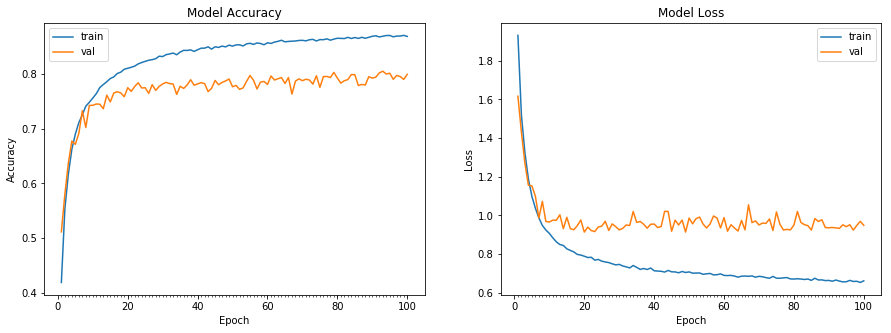

Accuracy on test data is: 79.91


In [0]:
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(train_history)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_X, test_y, model))

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir("/content/gdrive/My Drive/EVA/Project_9")

In [0]:
model = load_model('model_with_cutout.hdf5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
def gradcam(model,layer,img,normalized_input=True,show=False):
  if not normalized_input:
    img = img/255
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  layer_out_channels = last_conv_layer.output_shape[-1]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(layer_out_channels):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  heatmap = heatmap/255
  
#   superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0)
  superimposed_img = 0.7*(img) + 0.3*heatmap
  superimposed_img = superimposed_img
  if show:
    plt.imshow(img)
    plt.show()
    plt.imshow(heatmap)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()
  return img,heatmap,superimposed_img

# _ = gradcam(model,"output_transition",X_e[0],show=True)

def show_examples_with_gradcam(model,layer,X,Y,classes,image_size_multiplier=2):
  Y = np.argmax(Y, axis=1)
  columns = 5
  rows = int(np.ceil(len(X) / columns))
  
  fig_height = rows * image_size_multiplier * 3
  fig_width = columns * image_size_multiplier
  fig = plt.figure(figsize=(fig_width, fig_height))
  outer = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.2)
  for i in range(rows*columns):
    if i>=len(X):
      break
    x = X[i]
    y = Y[i]
    img,heatmap,superimposed_img = gradcam(model,layer,x,show=False)
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.0, hspace=0.15)
    imgs = [img,heatmap,superimposed_img]
    titles = ["Image: "+classes[y],"HeatMap","SuperImposed Image"]
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(imgs[j])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[j])
        fig.add_subplot(ax)
  
  fig.show()

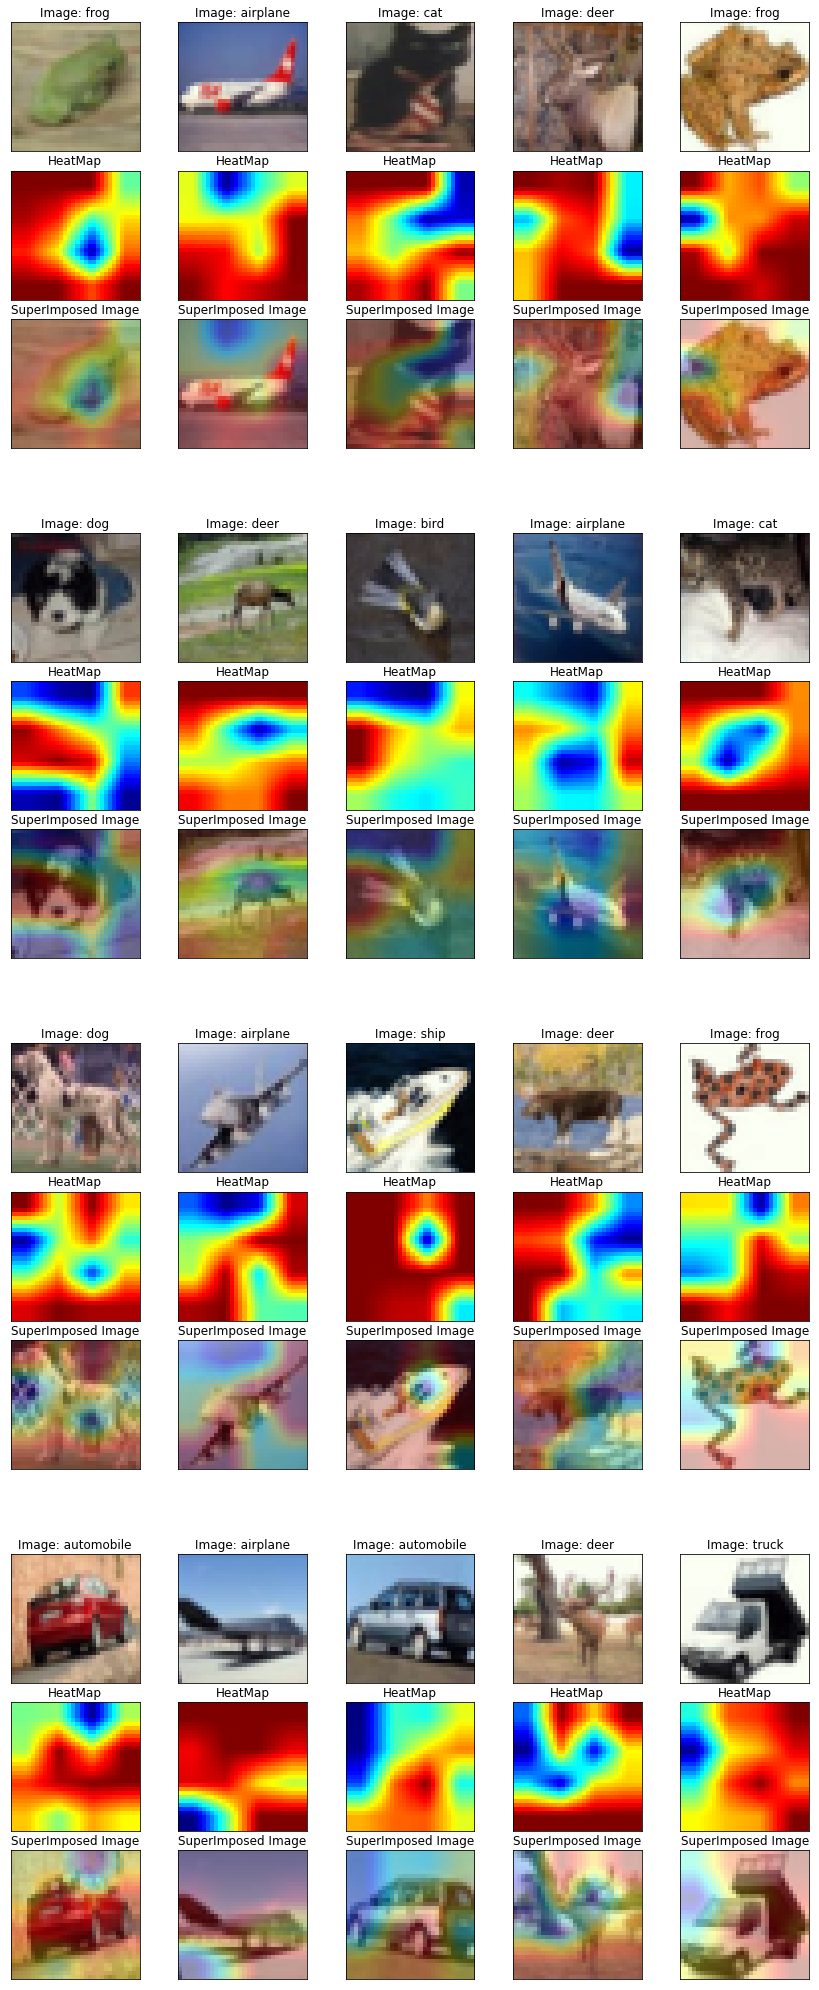

In [0]:
show_examples_with_gradcam(model,"conv2d_9",X_e[79:99], Y_e[79:99],classes,image_size_multiplier=3)

#Grad CAM without cutout testing

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import cv2
from keras import regularizers
from keras.callbacks import *

from sklearn.utils import shuffle
import gc
import matplotlib.gridspec as gridspec


Using TensorFlow backend.


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Define the model
model = Sequential()
weight_decay=0.001

#Convolution block
model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32, 32, 3))) #32 #3
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #32 #5
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #16 #10
model.add(Convolution2D(10,1,kernel_regularizer=regularizers.l2(weight_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


#Convolution block
model.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16 #12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16 #14
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #8 #28
model.add(Convolution2D(10,1,kernel_regularizer=regularizers.l2(weight_decay))) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


#Convolution block
model.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8 #30
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8 #32
model.add(Activation('relu'))
model.add(BatchNormalization())


#Transition block
model.add(MaxPooling2D(pool_size=(2, 2))) #4 #64
model.add(Convolution2D(10,1))#,kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())

#Prediction layer
model.add(Convolution2D(10,4))
model.add(Flatten())
model.add(Activation('softmax'))


          
# Compile the model
  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0715 16:58:01.606023 140330353031040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  """
W0715 16:58:01.645772 140330353031040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 16:58:01.654838 140330353031040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 16:58:01.701230 140330353031040 deprecation_wrapper

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
filepath="/content/gdrive/My Drive/EVA/Project_9/model_without_cutout.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=False)
callbacks = [checkpoint] 

In [0]:
X_train, Y_train, X_test, Y_test = get_cifar10_data(preprocess=False)
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
# datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

#datagen_validation = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,)
datagen.fit(X_train)
#datagen_validation.fit(X_test)
#print(datagen.mean)
#print(datagen_validation.mean)
iterator=datagen.flow(X_train, Y_train,batch_size=len(X_train), shuffle=False)
batchX, batchy = iterator.next()

iterator1 = datagen.flow(X_test, Y_test, batch_size=len(X_test), shuffle=False)
batch_testX, batch_testy = iterator1.next()

train_X = batchX
test_X = batch_testX

train_y=batchy
test_y=batch_testy


#train_iterator = datagen.flow(X_train, Y_train, batch_size=256,shuffle=True)
#validation_iterator = datagen.flow(X_test, Y_test, batch_size=512,shuffle=True)

#print('Batches train=%d, test=%d' % (len(train_iterator), len(validation_iterator)))


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
train_history = model.fit_generator(datagen.flow(train_X, train_y, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (test_X, test_y), verbose=1,callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  # Remove the CWD from sys.path while we load stuff.
W0715 16:59:02.045847 140330353031040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_

Epoch 1/100
390/390 [==============================] - 14s 35ms/step - loss: 1.8267 - acc: 0.4588 - val_loss: 1.5084 - val_acc: 0.5625

Epoch 00001: val_acc improved from -inf to 0.56250, saving model to /content/gdrive/My Drive/EVA/Project_9/model_without_cutout.hdf5
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3885 - acc: 0.6043 - val_loss: 1.2968 - val_acc: 0.6336

Epoch 00002: val_acc improved from 0.56250 to 0.63360, saving model to /content/gdrive/My Drive/EVA/Project_9/model_without_cutout.hdf5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1862 - acc: 0.6681 - val_loss: 1.1585 - val_acc: 0.6787

Epoch 00003: val_acc improved from 0.63360 to 0.67870, saving model to /content/gdrive/My Drive/EVA/Project_9/model_without_cutout.hdf5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 1.0504 - acc: 0.7129 - val_loss: 1.0592 - val_acc: 0.7085

Epoch 00004: val_acc improved from 0.67870 to 0.70850,

Model took 911.52 seconds to train


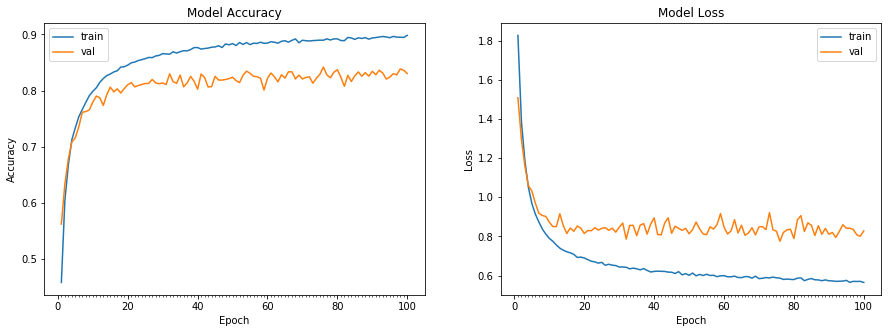

Accuracy on test data is: 83.05


In [0]:
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(train_history)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_X, test_y, model))

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir("/content/gdrive/My Drive/EVA/Project_9")

In [0]:
model = load_model('model_without_cutout.hdf5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
def gradcam(model,layer,img,normalized_input=True,show=False):
  if not normalized_input:
    img = img/255
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  layer_out_channels = last_conv_layer.output_shape[-1]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(layer_out_channels):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  heatmap = heatmap/255
  
#   superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0)
  superimposed_img = 0.7*(img) + 0.3*heatmap
  superimposed_img = superimposed_img
  if show:
    plt.imshow(img)
    plt.show()
    plt.imshow(heatmap)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()
  return img,heatmap,superimposed_img

# _ = gradcam(model,"output_transition",X_e[0],show=True)

def show_examples_with_gradcam(model,layer,X,Y,classes,image_size_multiplier=2):
  Y = np.argmax(Y, axis=1)
  columns = 5
  rows = int(np.ceil(len(X) / columns))
  
  fig_height = rows * image_size_multiplier * 3
  fig_width = columns * image_size_multiplier
  fig = plt.figure(figsize=(fig_width, fig_height))
  outer = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.2)
  for i in range(rows*columns):
    if i>=len(X):
      break
    x = X[i]
    y = Y[i]
    img,heatmap,superimposed_img = gradcam(model,layer,x,show=False)
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.0, hspace=0.15)
    imgs = [img,heatmap,superimposed_img]
    titles = ["Image: "+classes[y],"HeatMap","SuperImposed Image"]
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(imgs[j])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[j])
        fig.add_subplot(ax)
  
  fig.show()

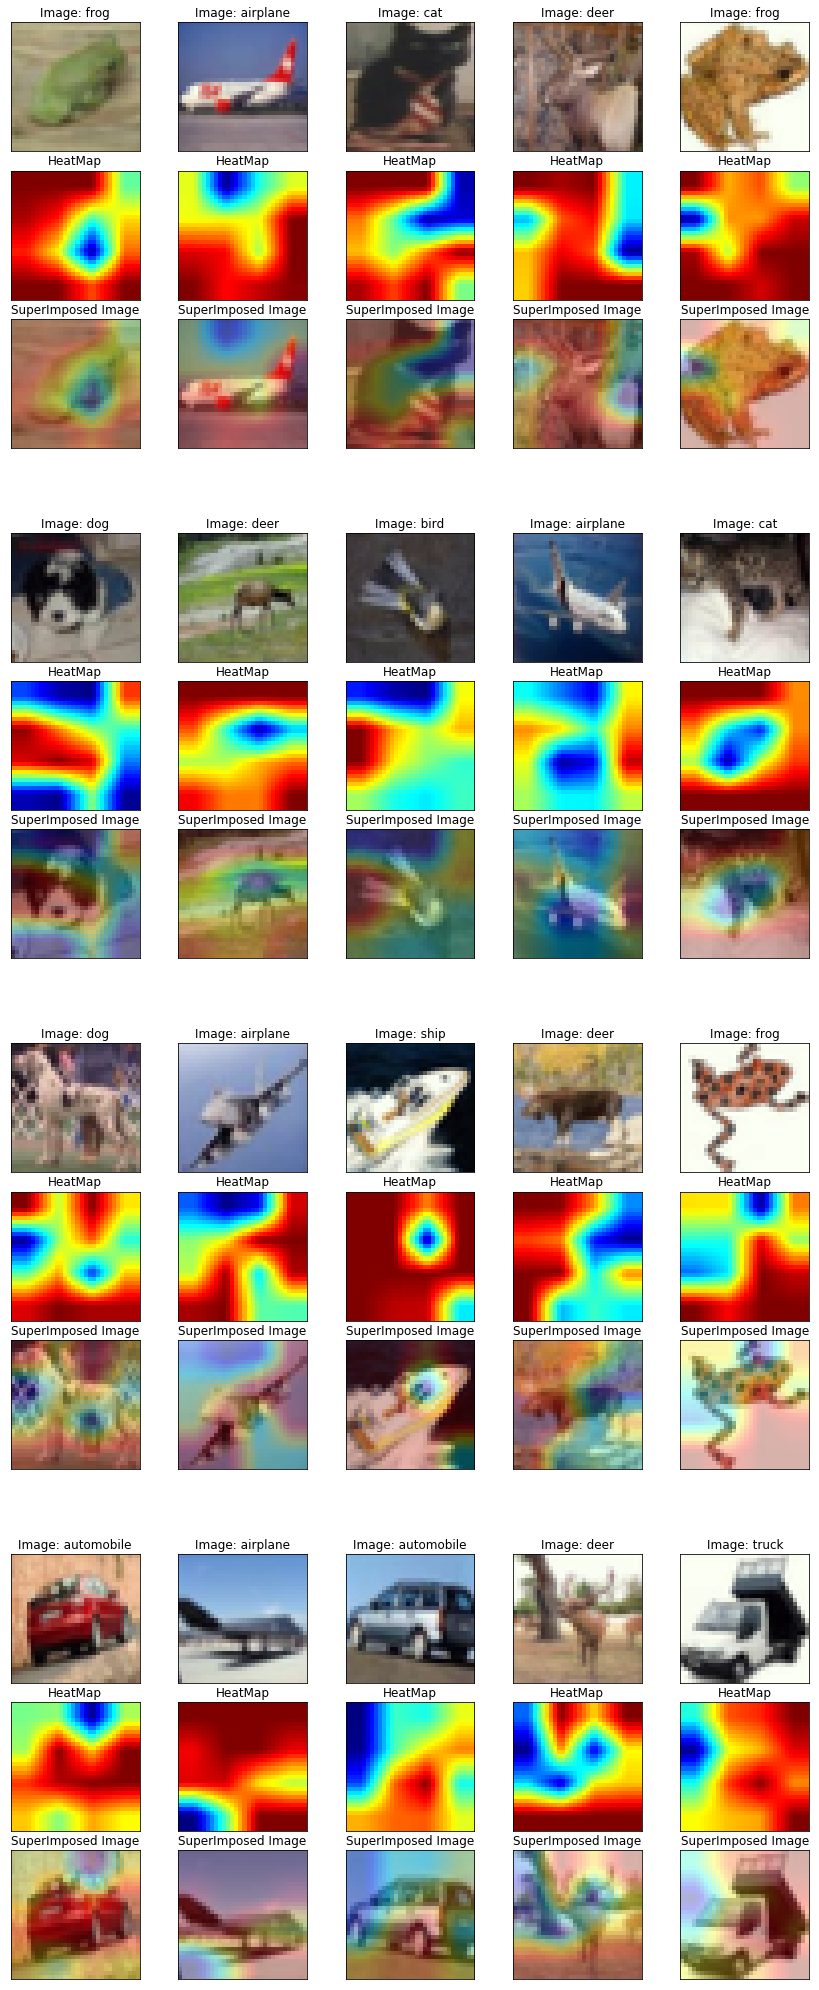

In [0]:
show_examples_with_gradcam(model,"conv2d_9",X_e[79:99], Y_e[79:99],classes,image_size_multiplier=3)